In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [28]:
arabi_genes = pd.read_csv('/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/arabi_gene_results.csv', index_col= 0)
arabi_ortho = pd.read_csv('/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/arabi_ortho_trimmed_out_2_gene_families.csv', index_col= 0)
tomato_genes = pd.read_csv('/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/rice_gene_results.csv', index_col= 0)
tomato_ortho = pd.read_csv('/data/passala/Module_paper_data/Rice_arabi_cold/Ortho_vs_gene_files/rice_ortho_trimmed_out_2_gene_families.csv', index_col= 0)

In [29]:
log_fc_change_evaluation_value = 1.5
log_fc_change_evaluation_value_negative = -1*log_fc_change_evaluation_value

In [30]:
tomato_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10238at3193,117.912928,-0.059689,0.360002,-0.165801,0.868314,0.999922
103112at3193,20.844517,0.039788,0.987437,0.040295,0.967858,0.999922
104149at3193,555.821329,0.057582,0.222150,0.259201,0.795480,0.999922
105395at3193,112.654517,0.223998,0.459666,0.487305,0.626042,0.999922
105793at3193,442.618276,0.015548,0.238639,0.065153,0.948052,0.999922
...,...,...,...,...,...,...
9789at3193,364.792970,0.028603,0.279973,0.102164,0.918626,0.999922
9797at3193,83.057230,-0.218619,0.478628,-0.456762,0.647842,0.999922
9814at3193,197.698917,0.282419,0.310953,0.908239,0.363752,0.999922
9942at3193,1544.703011,0.065439,0.172387,0.379602,0.704241,0.999922


In [31]:
trimmed_tomato_ortho = tomato_ortho.loc[tomato_ortho.index.isin(arabi_ortho.index)]
trimmed_arabi_ortho = arabi_ortho.loc[arabi_ortho.index.isin(trimmed_tomato_ortho.index)]


In [32]:
trimmed_arabi_ortho_named = trimmed_arabi_ortho.rename(columns = {'log2FoldChange':'Arabidopsis Log2FC'})
trimmed_tomato_ortho_named = trimmed_tomato_ortho.rename(columns = {'log2FoldChange':'Tomato Log2FC'})



In [33]:
merged_ortho_df = trimmed_arabi_ortho_named[['Arabidopsis Log2FC']].merge(right = trimmed_tomato_ortho_named, left_index= True, right_index = True)

In [34]:
merged_ortho_df

,Arabidopsis Log2FC,baseMean,Tomato Log2FC,lfcSE,stat,pvalue,padj
10772at3193,0.707963,48.421092,-0.008752,0.570016,-0.015354,0.987750,0.999922
10950at3193,0.012729,4398.178535,0.018003,0.161355,0.111572,0.911163,0.999922
109808at3193,0.301060,317.664035,0.079179,0.262645,0.301467,0.763058,0.999922
109841at3193,-0.033875,142.863201,-0.269754,0.343990,-0.784190,0.432929,0.999922
109843at3193,0.744674,1018.641389,-0.073367,0.193558,-0.379043,0.704656,0.999922
...,...,...,...,...,...,...,...
9450at3193,-0.883490,3245.010606,0.164117,0.169092,0.970578,0.331759,0.999922
9592at3193,-0.392489,530.673522,0.135438,0.215421,0.628712,0.529538,0.999922
9601at3193,-0.117255,1007.380153,0.085511,0.186651,0.458133,0.646857,0.999922
9609at3193,-1.164428,781.300994,-0.218419,0.257859,-0.847047,0.396969,0.999922


In [35]:
log_fc_change_evaluation_value

1.5

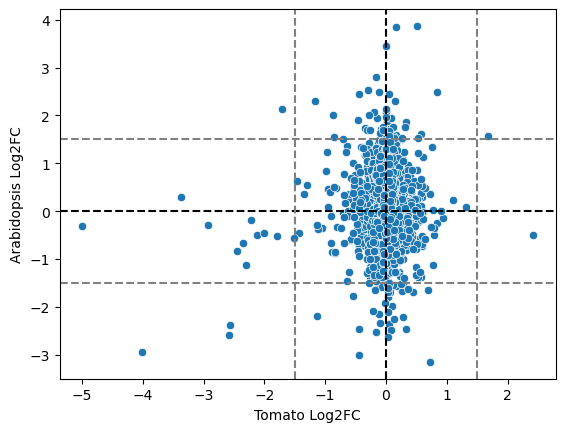

In [36]:
sns.scatterplot(data = merged_ortho_df, x ='Tomato Log2FC', y = 'Arabidopsis Log2FC' )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(x =log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(y =log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(x =log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(y =log_fc_change_evaluation_value_negative, color="grey", linestyle="--")

Text(0, 0.5, 'Orthogroup-wise log2-fold change in \n arabidopsis Drought')

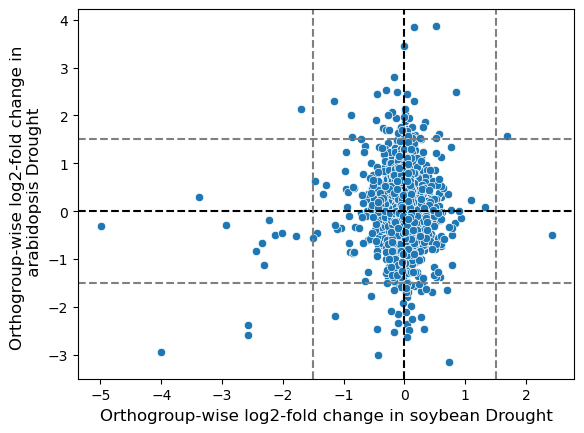

In [37]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.xlabel("Orthogroup-wise log2-fold change in rice Drought", fontsize = 12)
plt.ylabel("Orthogroup-wise log2-fold change in \n arabidopsis Drought", fontsize = 12)

In [38]:
trimmed_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10772at3193,1280.255464,0.707963,0.096189,7.360097,1.837765e-13,1.425199e-12
10950at3193,506.926572,0.012729,0.108233,0.117607,9.063788e-01,9.373186e-01
109808at3193,330.349166,0.301060,0.132553,2.271244,2.313223e-02,4.431748e-02
109841at3193,94.411249,-0.033875,0.186825,-0.181320,8.561162e-01,8.977190e-01
109843at3193,552.096083,0.744674,0.112576,6.614832,3.719733e-11,2.406113e-10
...,...,...,...,...,...,...
9450at3193,1008.296221,-0.883490,0.098800,-8.942212,3.814578e-19,4.563406e-18
9592at3193,238.979169,-0.392489,0.138469,-2.834489,4.589898e-03,1.058492e-02
9601at3193,203.979398,-0.117255,0.135781,-0.863561,3.878291e-01,4.876525e-01
9609at3193,23.739177,-1.164428,0.332634,-3.500625,4.641683e-04,1.306559e-03


In [39]:
all(trimmed_arabi_ortho.index == trimmed_tomato_ortho.index)

True

In [40]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = merged_result.loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)]
all_under_1 = merged_result.loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_bottom = merged_result.loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_top = merged_result.loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']>log_fc_change_evaluation_value)]

In [41]:
merged_result['Classification'] = 'Non-substantial'
merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)] = 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']>log_fc_change_evaluation_value)]= 'Substantial'

/tmp/ipykernel_873346/2994845458.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)] = 'S

Text(0, 0.5, 'Orthogroup-wise log2-fold change in arabidopsis Drought')

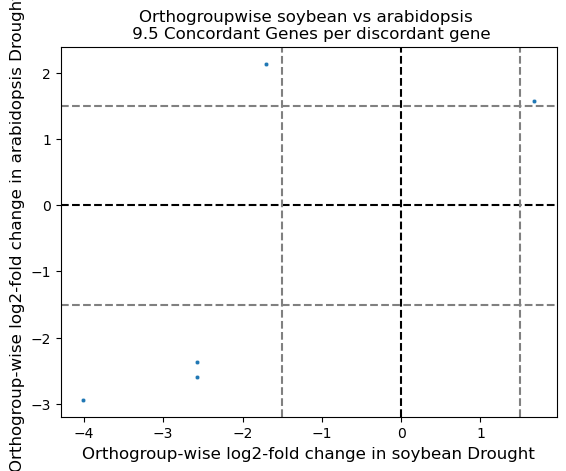

In [42]:
sns.scatterplot(data = merged_result.loc[merged_result['Classification'] == "Substantial"] , x ='Tomato', y = 'Arabi', s = 10)
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.title('Orthogroupwise rice vs arabidopsis \n 9.5 Concordant Genes per discordant gene')
plt.xlabel("Orthogroup-wise log2-fold change in rice Drought", fontsize = 12)
plt.ylabel("Orthogroup-wise log2-fold change in arabidopsis Drought", fontsize = 12)

In [43]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

4.0

In [44]:
discord_bottom

,Tomato,Arabi


In [45]:
discord_top

,Tomato,Arabi
148,-1.709189,2.129589


In [46]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])
pos_thresh = 1
neg_thresh = 1
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.921326076199901
0.921326076199901
0.921326076199901
0.921326076199901


In [47]:
arabi_disconcordant_change

,Tomato,Arabi
9,0.516899,3.870857
15,-0.116749,1.241914
28,0.157323,1.078718
44,-0.107866,1.217285
48,0.155985,3.848413
...,...,...
1981,-0.041946,1.688233
1987,0.259250,1.531137
1999,0.272009,1.044847
2009,-0.095634,1.144827


In [48]:
tomato_any_change

,Tomato,Arabi
0,-0.008752,0.707963
1,0.018003,0.012729
2,0.079179,0.301060
3,-0.269754,-0.033875
4,-0.073367,0.744674
...,...,...
2016,0.164117,-0.883490
2017,0.135438,-0.392489
2018,0.085511,-0.117255
2019,-0.218419,-1.164428


In [49]:
tomato_concordant_change

,Tomato,Arabi
0,-0.008752,0.707963
1,0.018003,0.012729
2,0.079179,0.301060
3,-0.269754,-0.033875
4,-0.073367,0.744674
...,...,...
2016,0.164117,-0.883490
2017,0.135438,-0.392489
2018,0.085511,-0.117255
2019,-0.218419,-1.164428


In [50]:
arabidopsis_tomato_nm = pd.read_csv('/data/passala/OrthoDB_data/V_11_pairwise_maps_fixed_problem_species/rice_jp_to_arabidopsis_ortholog_NM.csv')

In [51]:
arabidopsis_tomato_nm

,rice_jp OrthoGene,arabidopsis OrthoGene,Orthogroup,rice_jp Symbol,arabidopsis Symbol
0,39947_0:0033f9,3702_0:001f5f,10092at3193,Os05g0333200,AT2G26300
1,39947_0:005347,3702_0:000e32,10147at3193,Os08g0137200,AT1G73910
2,39947_0:005347,3702_0:0018a2,10147at3193,Os08g0137200,AT1G18450
3,39947_0:00028f,3702_0:000573,10228at3193,Os01g0575500,AT1G49040
4,39947_0:001fe4,3702_0:0012bf,10238at3193,Os03g0668400,AT1G79120
...,...,...,...,...,...
42864,39947_0:0048a3,3702_0:003134,9942at3193,Os07g0271000,AT3G59920
42865,39947_0:0020d4,3702_0:005540,9942at3193,Os03g0277000,AT5G09550
42866,39947_0:003388,3702_0:005540,9942at3193,Os05g0304400,AT5G09550
42867,39947_0:003b6c,3702_0:005540,9942at3193,Os05g0418000,AT5G09550


In [54]:
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'arabidopsis Symbol',)
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'rice_jp Symbol',)
arabidopsis_tomato_nm

,rice_jp OrthoGene,arabidopsis OrthoGene,Orthogroup,rice_jp Symbol,arabidopsis Symbol
0,39947_0:0033f9,3702_0:001f5f,10092at3193,Os05g0333200,AT2G26300
1,39947_0:005347,3702_0:000e32,10147at3193,Os08g0137200,AT1G73910
3,39947_0:00028f,3702_0:000573,10228at3193,Os01g0575500,AT1G49040
4,39947_0:001fe4,3702_0:0012bf,10238at3193,Os03g0668400,AT1G79120
6,39947_0:001992,3702_0:0003d0,10488at3193,LOC4329458,AT1G08260
...,...,...,...,...,...
42850,39947_0:006dee,3702_0:00121f,9828at3193,Os12g0638900,AT1G74750
42852,39947_0:003d49,3702_0:0052b3,9836at3193,LOC4340090,AT5G11380
42853,39947_0:00158e,3702_0:001def,9877at3193,Os02g0232400,AT2G42790
42856,39947_0:00335b,3702_0:00114d,9919at3193,Os05g0519500,AT1G15440


In [55]:
arabi_genes_trimmed = arabi_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['rice_jp Symbol','arabidopsis Symbol']], right_on= 'arabidopsis Symbol')
arabi_genes_trimmed = arabi_genes_trimmed.drop_duplicates(subset = 'arabidopsis Symbol', keep = False)
arabi_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,rice_jp Symbol,arabidopsis Symbol
31818,92.481265,-0.070804,0.206666,-0.342603,7.318968e-01,7.978982e-01,Os03g0784300,AT1G01020
40821,31.136860,-0.912607,0.352845,-2.586425,9.697735e-03,2.058756e-02,Os03g0120900,AT1G01030
31329,518.650594,0.175542,0.122584,1.432022,1.521376e-01,2.242751e-01,LOC4331440,AT1G01040
36257,1315.757517,-0.441851,0.117745,-3.752597,1.750124e-04,5.299805e-04,Os08g0157600,AT1G01060
26663,609.404481,-1.121014,0.140031,-8.005443,1.190370e-15,1.173921e-14,Os08g0117100,AT1G01080
...,...,...,...,...,...,...,...,...
14250,2027.529465,-0.335234,0.104505,-3.207841,1.337353e-03,3.427474e-03,Os03g0439700,AT5G67370
28710,38.095290,-0.246573,0.325586,-0.757322,4.488572e-01,5.469072e-01,Os03g0762100,AT5G67390
22811,75.377650,0.256628,0.235163,1.091279,2.751501e-01,3.674251e-01,Os10g0347000,AT5G67460
32128,274.476353,0.515933,0.148052,3.484811,4.924839e-04,1.370917e-03,LOC4331972,AT5G67530


In [56]:
arabidopsis_tomato_nm

,rice_jp OrthoGene,arabidopsis OrthoGene,Orthogroup,rice_jp Symbol,arabidopsis Symbol
0,39947_0:0033f9,3702_0:001f5f,10092at3193,Os05g0333200,AT2G26300
1,39947_0:005347,3702_0:000e32,10147at3193,Os08g0137200,AT1G73910
3,39947_0:00028f,3702_0:000573,10228at3193,Os01g0575500,AT1G49040
4,39947_0:001fe4,3702_0:0012bf,10238at3193,Os03g0668400,AT1G79120
6,39947_0:001992,3702_0:0003d0,10488at3193,LOC4329458,AT1G08260
...,...,...,...,...,...
42850,39947_0:006dee,3702_0:00121f,9828at3193,Os12g0638900,AT1G74750
42852,39947_0:003d49,3702_0:0052b3,9836at3193,LOC4340090,AT5G11380
42853,39947_0:00158e,3702_0:001def,9877at3193,Os02g0232400,AT2G42790
42856,39947_0:00335b,3702_0:00114d,9919at3193,Os05g0519500,AT1G15440


In [57]:
tomato_genes.head(50)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Os01g0100100,987.421316,0.048133,0.210712,0.228429,0.819313,0.999929
Os01g0100400,73.560620,0.272541,0.599612,0.454529,0.649448,0.999929
Os01g0100500,776.423823,0.159056,0.214962,0.739924,0.459346,0.999929
Os01g0100600,299.542810,-0.088580,0.270434,-0.327547,0.743254,0.999929
Os01g0100700,731.051223,-0.041348,0.232079,-0.178163,0.858595,0.999929
Os01g0100800,462.252670,-0.050061,0.243007,-0.206006,0.836786,0.999929
Os01g0100900,2426.277542,0.145330,0.178641,0.813530,0.415915,0.999929
Os01g0101150,40.545820,0.324442,0.607709,0.533877,0.593426,0.999929
Os01g0101200,1137.949431,-0.421785,0.209702,-2.011348,0.044289,0.999929
Os01g0101300,31.735546,-0.046890,0.758202,-0.061844,0.950687,0.999929


In [59]:
tomato_genes_trimmed = tomato_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['rice_jp Symbol','arabidopsis Symbol']], right_on= 'rice_jp Symbol')
#tomato_genes_trimmed = tomato_genes_trimmed.drop_duplicates(subset = 'arabidopsis Symbol', keep = False)
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,rice_jp Symbol,arabidopsis Symbol
4355,987.421316,0.048133,0.210712,0.228429,0.819313,0.999929,Os01g0100100,AT2G43490
23078,731.051223,-0.041348,0.232079,-0.178163,0.858595,0.999929,Os01g0100700,AT2G37270
30673,2426.277542,0.145330,0.178641,0.813530,0.415915,0.999929,Os01g0100900,AT1G27980
6279,31.735546,-0.046890,0.758202,-0.061844,0.950687,0.999929,Os01g0101300,AT4G24880
42229,2266.587779,0.002301,0.175349,0.013123,0.989530,0.999929,Os01g0101600,AT3G23900
...,...,...,...,...,...,...,...,...
7214,605.062239,0.079783,0.212234,0.375919,0.706977,0.999929,Os12g0639100,AT1G74780
17052,10728.061308,0.089669,0.177084,0.506363,0.612602,0.999929,Os12g0640600,AT3G63520
40560,2303.604716,0.033248,0.178462,0.186302,0.852208,0.999929,Os12g0641100,AT2G01980
14997,23.215047,-0.147560,0.870252,-0.169561,0.865356,0.999929,Os12g0641300,AT1G29700


In [60]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,rice_jp Symbol,arabidopsis Symbol
4355,987.421316,0.048133,0.210712,0.228429,0.819313,0.999929,Os01g0100100,AT2G43490
23078,731.051223,-0.041348,0.232079,-0.178163,0.858595,0.999929,Os01g0100700,AT2G37270
30673,2426.277542,0.145330,0.178641,0.813530,0.415915,0.999929,Os01g0100900,AT1G27980
6279,31.735546,-0.046890,0.758202,-0.061844,0.950687,0.999929,Os01g0101300,AT4G24880
42229,2266.587779,0.002301,0.175349,0.013123,0.989530,0.999929,Os01g0101600,AT3G23900
...,...,...,...,...,...,...,...,...
7214,605.062239,0.079783,0.212234,0.375919,0.706977,0.999929,Os12g0639100,AT1G74780
17052,10728.061308,0.089669,0.177084,0.506363,0.612602,0.999929,Os12g0640600,AT3G63520
40560,2303.604716,0.033248,0.178462,0.186302,0.852208,0.999929,Os12g0641100,AT2G01980
14997,23.215047,-0.147560,0.870252,-0.169561,0.865356,0.999929,Os12g0641300,AT1G29700


In [61]:
arabi_genes_trimmed = arabi_genes_trimmed.loc[arabi_genes_trimmed['arabidopsis Symbol'].isin(tomato_genes_trimmed['arabidopsis Symbol'])]
tomato_genes_trimmed = tomato_genes_trimmed.loc[tomato_genes_trimmed['rice_jp Symbol'].isin(arabi_genes_trimmed['rice_jp Symbol'])]


In [62]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,rice_jp Symbol,arabidopsis Symbol
4355,987.421316,0.048133,0.210712,0.228429,0.819313,0.999929,Os01g0100100,AT2G43490
23078,731.051223,-0.041348,0.232079,-0.178163,0.858595,0.999929,Os01g0100700,AT2G37270
30673,2426.277542,0.145330,0.178641,0.813530,0.415915,0.999929,Os01g0100900,AT1G27980
6279,31.735546,-0.046890,0.758202,-0.061844,0.950687,0.999929,Os01g0101300,AT4G24880
42229,2266.587779,0.002301,0.175349,0.013123,0.989530,0.999929,Os01g0101600,AT3G23900
...,...,...,...,...,...,...,...,...
7214,605.062239,0.079783,0.212234,0.375919,0.706977,0.999929,Os12g0639100,AT1G74780
17052,10728.061308,0.089669,0.177084,0.506363,0.612602,0.999929,Os12g0640600,AT3G63520
40560,2303.604716,0.033248,0.178462,0.186302,0.852208,0.999929,Os12g0641100,AT2G01980
14997,23.215047,-0.147560,0.870252,-0.169561,0.865356,0.999929,Os12g0641300,AT1G29700


In [63]:
tomato_genes_trimmed = (tomato_genes_trimmed.set_index('arabidopsis Symbol')
          .reindex(arabi_genes_trimmed.set_index('arabidopsis Symbol').index)
          .reset_index()
       )

In [64]:
tomato_genes_trimmed

,arabidopsis Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,rice_jp Symbol
0,AT1G01020,159.570516,0.248305,0.340122,0.730048,4.653607e-01,9.999287e-01,Os03g0784300
1,AT1G01030,179.832619,-0.153138,0.347277,-0.440966,6.592375e-01,9.999287e-01,Os03g0120900
2,AT1G01060,11756.677896,0.161403,0.165231,0.976832,3.286522e-01,9.999287e-01,Os08g0157600
3,AT1G01080,622.017126,-0.338917,0.225991,-1.499695,1.336935e-01,9.999287e-01,Os08g0117100
4,AT1G01090,1278.125844,-0.167728,0.214843,-0.780704,4.349767e-01,9.999287e-01,Os04g0119400
...,...,...,...,...,...,...,...,...
5195,AT5G67290,268.577180,0.135354,0.341880,0.395910,6.921714e-01,9.999287e-01,Os07g0155100
5196,AT5G67320,26.508723,0.145857,0.835186,0.174641,8.613621e-01,9.999287e-01,Os07g0405100
5197,AT5G67350,137.710130,-0.214412,0.441419,-0.485734,6.271557e-01,9.999287e-01,Os07g0589600
5198,AT5G67370,10620.661761,-1.250339,0.195548,-6.394040,1.615587e-10,1.575198e-07,Os03g0439700


In [65]:
arabi_genes_trimmed = arabi_genes_trimmed.reset_index()

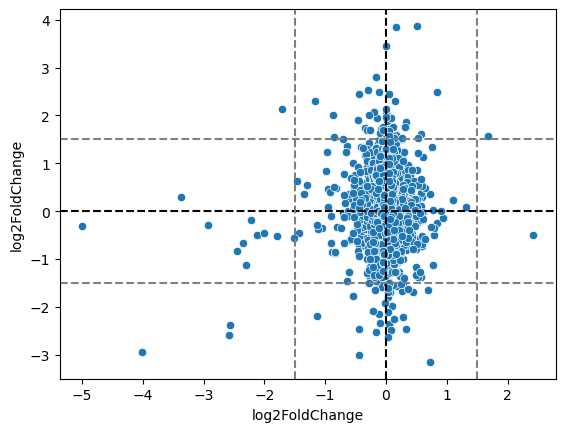

In [66]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")

Text(0, 0.5, 'Genewise log2-fold change in \n arabidopsis Drought')

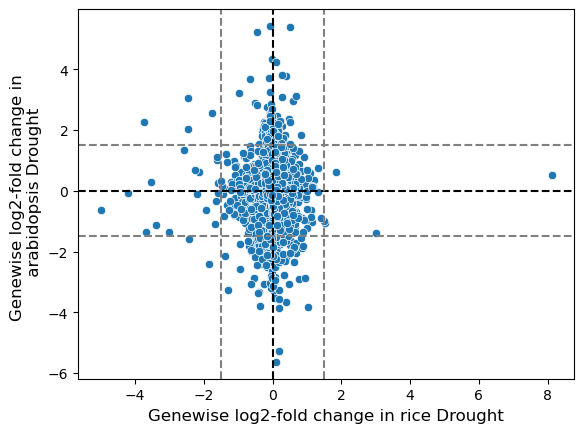

In [67]:
sns.scatterplot(x =tomato_genes_trimmed['log2FoldChange'], y = arabi_genes_trimmed['log2FoldChange'])
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.xlabel("Genewise log2-fold change in rice Drought", fontsize = 12)
plt.ylabel("Genewise log2-fold change in \n arabidopsis Drought", fontsize = 12)

In [68]:
new_merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = new_merged_result.loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]
all_under_1 = new_merged_result.loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_bottom = new_merged_result.loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_top = new_merged_result.loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]

In [69]:
new_merged_result['Classification'] = 'Non-substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)] = 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]= 'Substantial'

/tmp/ipykernel_873346/1856289886.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_

Text(0, 0.5, 'Genewise log2-fold change in Sorghum Drought')

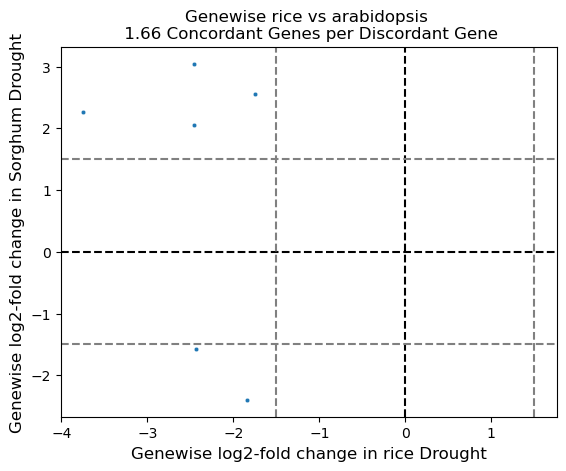

In [70]:
sns.scatterplot(data = new_merged_result.loc[new_merged_result['Classification'] == "Substantial"] , x ='Tomato', y = 'Arabi', s = 10 )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.title('Genewise rice vs arabidopsis \n 1.66 Concordant Genes per Discordant Gene')
plt.xlabel("Genewise log2-fold change in rice Drought", fontsize = 12)
plt.ylabel("Genewise log2-fold change in Sorghum Drought", fontsize = 12)

In [71]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

0.5

In [ ]:
all_over_1

In [ ]:
all_under_1

In [ ]:
merged_result

In [ ]:
merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

pos_thresh = 0
neg_thresh = 0
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

In [ ]:
stats.spearmanr(a=tomato_genes_trimmed['log2FoldChange'], b = arabi_genes_trimmed['log2FoldChange'] )

In [347]:
down = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] <= -2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
up = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] >= 2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
down_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] <= -2)
    & (arabi_genes_trimmed["padj"] <= 0.001)
]
up_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] >= 2) & (arabi_genes_trimmed["padj"] <= 0.001)
]

In [348]:
down_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] <= -2)
    & (trimmed_arabi_ortho["padj"] <= 0.001)
]
up_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] >= 2) & (trimmed_arabi_ortho["padj"] <= 0.001)]

down_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] <= -2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]
up_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] >= 2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]

In [ ]:
len(up_arabi_ortho.merge(how = "inner", right_index = True, left_index= True, right = up_ortho))

In [ ]:
up_ortho

In [ ]:
up_arabi_ortho

In [ ]:
up

In [ ]:
up_arabi

In [ ]:
up_arabi.merge(how = "inner", on = 'arabidopsis Symbol', right = up)